In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)  # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)


In [4]:
def build_cae(shape, bottleneck_dim):
    # Encoder
    encoder = models.Sequential([
        layers.InputLayer(shape=shape),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
        layers.Flatten(),
        layers.Dense(bottleneck_dim, activation='relu', name='bottleneck')  # Bottleneck layer
    ])

    # Decoder
    decoder = models.Sequential([
        layers.InputLayer(shape=(bottleneck_dim,)),
        layers.Dense(7 * 7 * 64, activation='relu'),
        layers.Reshape((7, 7, 64)),
        layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=2),
        layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same', strides=2),
        layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')  # Output layer
    ])

    # Combine encoder and decoder
    input_img = layers.Input(shape=shape)
    encoded = encoder(input_img)
    decoded = decoder(encoded)

    autoencoder = models.Model(input_img, decoded)
    return autoencoder


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 136ms/step - loss: 0.1122 - val_loss: 0.0584
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 134ms/step - loss: 0.0560 - val_loss: 0.0520
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 135ms/step - loss: 0.0512 - val_loss: 0.0497
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 135ms/step - loss: 0.0492 - val_loss: 0.0483
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 136ms/step - loss: 0.0481 - val_loss: 0.0470
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 135ms/step - loss: 0.0470 - val_loss: 0.0462
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 135ms/step - loss: 0.0461 - val_loss: 0.0456
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 135ms/step - loss: 0.0455 - val_loss: 0.0451
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 136ms/step - loss: 0.0451 - val_loss: 0.0450
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 137ms/step - loss: 0.0445 - val_loss: 0.0445
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 136ms/step - loss: 0.0442 - val_loss: 0.0440
Epoch 12/20
235/235

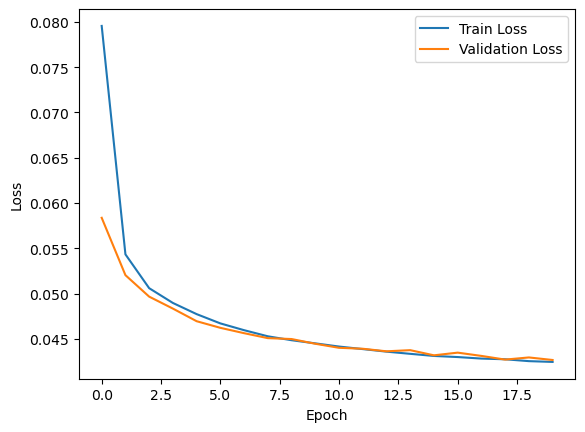

In [5]:
# Model setup
shape = x_train.shape[1:]  # (28, 28, 1)
bottleneck_dim = 2
cae = build_cae(shape, bottleneck_dim)

# Compile the model
cae.compile(optimizer='adam', loss='mse')

# Train the model
history = cae.fit(x_train, x_train, 
                  epochs=20, 
                  batch_size=256, 
                  validation_data=(x_test, x_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


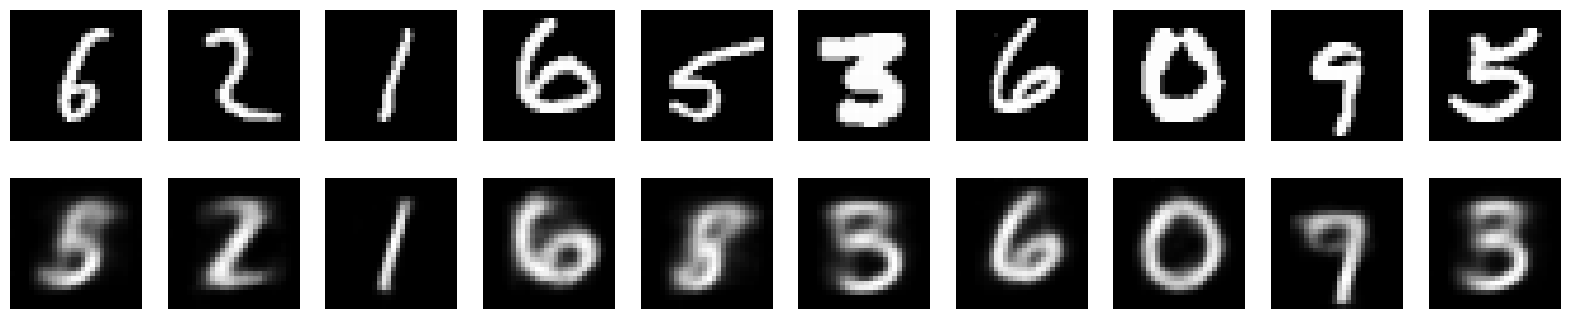

In [6]:
def visualize_cae_reconstructions(model, data, n=10):
    indices = np.random.choice(len(data), n)
    original = data[indices]
    reconstructed = model.predict(original)

    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.axis('off')

        # Reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.axis('off')

    plt.show()

# Visualize decoded images
visualize_cae_reconstructions(cae, x_test)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 139ms/step - loss: 0.1069 - val_loss: 0.0277
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 135ms/step - loss: 0.0256 - val_loss: 0.0209
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 133ms/step - loss: 0.0207 - val_loss: 0.0188
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 134ms/step - loss: 0.0187 - val_loss: 0.0178
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 134ms/step - loss: 0.0176 - val_loss: 0.0166
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 135ms/step - loss: 0.0168 - val_loss: 0.0162
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 136ms/step - loss: 0.0162 - val_loss: 0.0159
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 137ms/step - loss: 0.0159 - val_loss: 0.0154
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 137ms/step - loss: 0.0154 - val_loss: 0.0149
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 135ms/step - loss: 0.0151 - val_loss: 0.0150
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 136ms/step - loss: 0.0149 - val_loss: 0.0148
Epoch 12/20
235/235

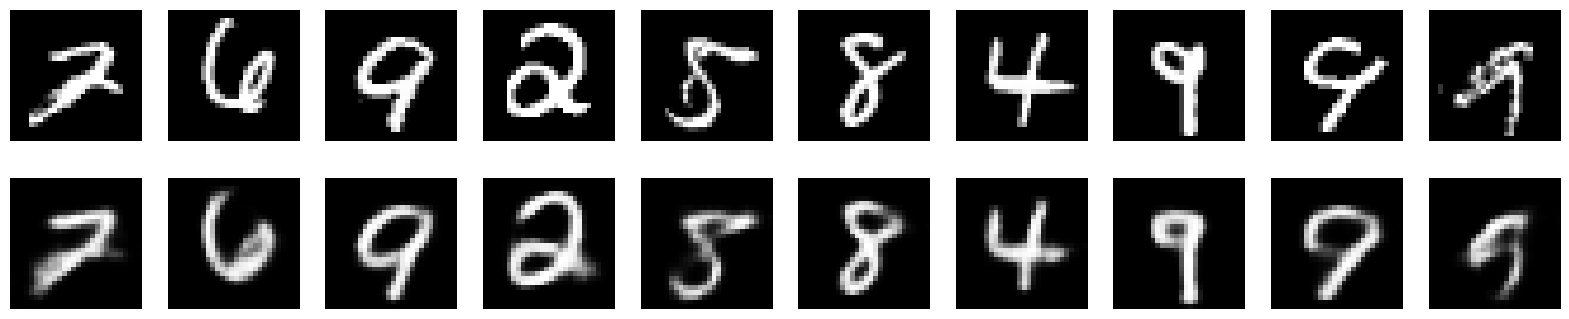

In [7]:
bottleneck_dim = 10  # Experiment with larger bottleneck sizes
cae = build_cae(input_shape, bottleneck_dim)
cae.compile(optimizer='adam', loss='mse')
cae.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

# Visualize reconstructed images
visualize_cae_reconstructions(cae, x_test)
